## SIR Example

In [1]:
%matplotlib inline

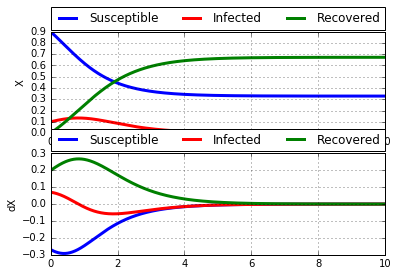

In [2]:
from SIR import *
sir = SIR(tstart=0.001, tend=10, dt=.01, beta=3, gamma=2, N=1)
sir.Initialize(S0=0.9, I0=0.1, R0=0);
sir.Simulate();
plt.subplot(2,1,1)
sir.PlotSIR(1)
plt.ylabel('X')
plt.subplot(2,1,2)
sir.PlotDSIR(1)
plt.ylabel('dX')

## Prepare data

In [3]:
import random as rn
eps = 0.025

data  = np.transpose(np.array([sir._Time, 
                               sir._SS + eps*np.random.randn(sir._SS.shape[0]), 
                               sir._II + eps*np.random.randn(sir._SS.shape[0]), 
                               sir._RR + eps*np.random.randn(sir._SS.shape[0])])) 
ddata = np.transpose(np.array([sir._Time, 
                               sir._dSS + eps*np.random.randn(sir._SS.shape[0]), 
                               sir._dII + eps*np.random.randn(sir._SS.shape[0]), 
                               sir._dRR + eps*np.random.randn(sir._SS.shape[0])]))

## SINDy at work

Initiated a class for Sparse Identification from Numerical Dynamics
**** Derivative Set ****
**** Candidate functions library has been created ****
**** Performing regression. Please wait... ****
Iteration in progress:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
**** Identification is complete. We now use it to simulate the system. ****


100% |########################################################################|


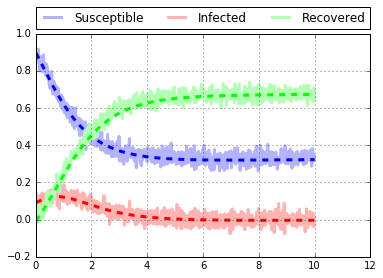

In [4]:
from SINDy import *
sin = SINDy(data=data,polyorder=2,usesine=False)
sin.SetDerivative(ddata)
sin.RunSINDy(simulate=True)
sin.SINDyPlot(statesymbols=["Susceptible","Infected","Recovered"],
              datacolors=[[0.7, 0.7, 1.0],[1.0, 0.7, 0.7],[0.7, 1.0, 0.7]],
              simcolors =[[0.0, 0.0, 1.0],[1.0, 0.0, 0.0],[0.0, 1.0, 0.0]])